# INTRODUCTION

## Project scope:
Project focused on Social Media Analytics and Text Mining topics in the context of 2020 US Presidential Elections.
** The aim of the project ** is to investigate the posts of Tweeter users that were created in the pre-election period for the presidency of the United States of America in 2020.

** The subject of the study ** are posts about the candidates for the US presidency - J. Biden and D. Trump. Thus, these are not candidates' posts, but posts about candidates.

During the analysis, we tried to find answers to the following questions:
1. How did the residents of the USA and other countries express themselves about the candidates?
2. Which languages were used most often?
3. What form of application (web, mobile, etc.) was most often used to post entries?
4. What was the activity of Twitter users writing about the candidates? What could this activity be related to?
5. What were the most common words?
6. Which posts about a given candidate were more opinions and which were facts?
7. As well as - ** On the basis of the collected data, it can be stated that the election results were falsified, or was the counting of votes correct? **

## Dataset:
The data comes from https://www.kaggle.com/manchunhui/us-election-2020-tweets

The author of the database used in the project is Manch Hui.

The data consists of tweets shared between October 15, 2020 and November 8, 2020. Entries apply to both candidates - D. Trump and J. Biden.

In [1]:
# library import
import pandas as pd

In [2]:
# data import
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Change to the appropriate directory
%cd /content/gdrive/MyDrive/NLP2023

# List files to verify the correct path
!ls

# Read the CSV file
tweets_biden = pd.read_csv("hashtag_joebiden.csv", lineterminator='\n', parse_dates=True)
tweets_trump = pd.read_csv("hashtag_donaldtrump.csv", lineterminator='\n', parse_dates = True)

# Ameryka to Ameryka
tweets_biden['country'].replace({'United States':'United States of America'}, inplace = True)
tweets_trump['country'].replace({'United States':'United States of America'}, inplace = True)

Mounted at /content/gdrive
/content/gdrive/MyDrive/NLP2023
amazon_cells_labelled.txt  Reviews_Filter1.csv	   tripadvisor_hotel_reviews.csv
chatbot.txt		   Reviews_Filter1.gsheet  tweets_en_biden.csv
hashtag_donaldtrump.csv    Reviews_Filter.csv	   tweets_en_trump.csv
hashtag_joebiden.csv	   Reviews_Filter.gsheet   vaccination_tweets.csv
imdb_labelled.txt	   searchengine2023.ipynb  vader_lexicon.txt


In [3]:
tweets_biden.head

<bound method NDFrame.head of                  created_at      tweet_id  \
0       2020-10-15 00:00:01  1.316529e+18   
1       2020-10-15 00:00:18  1.316529e+18   
2       2020-10-15 00:00:20  1.316529e+18   
3       2020-10-15 00:00:21  1.316529e+18   
4       2020-10-15 00:00:22  1.316529e+18   
...                     ...           ...   
776881  2020-11-08 23:59:38  1.325589e+18   
776882  2020-11-08 23:59:38  1.325589e+18   
776883  2020-11-08 23:59:41  1.325589e+18   
776884  2020-11-08 23:59:52  1.325589e+18   
776885  2020-11-08 23:59:58  1.325589e+18   

                                                    tweet  likes  \
0       #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0   
1       #HunterBiden #HunterBidenEmails #JoeBiden #Joe...    0.0   
2       @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...    0.0   
3       @chrislongview Watching and setting dvr. Let’s...    0.0   
4       #censorship #HunterBiden #Biden #BidenEmails #...    1.0   
...                  

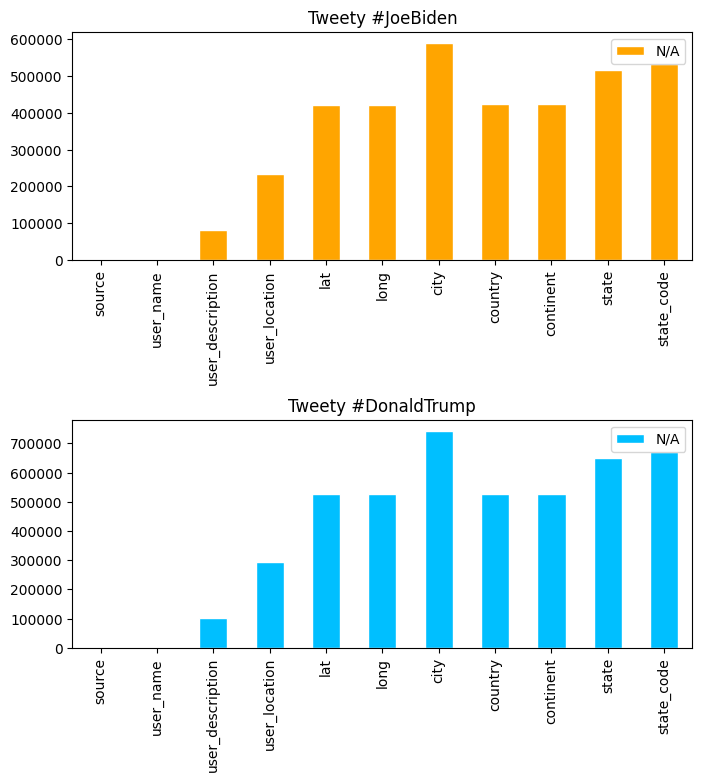

In [4]:
import matplotlib.pyplot as plt
# braki danych
na_vals_b=pd.DataFrame({'N/A':tweets_biden.isna().sum()})
na_vals_b=na_vals_b.loc[na_vals_b['N/A'] > 0]
na_vals_t=pd.DataFrame({'N/A':tweets_trump.isna().sum()})
na_vals_t=na_vals_t.loc[na_vals_t['N/A'] > 0]

# wykresy
barcolors = ['olivedrap','mediumslateblue','lightpink','orange','lightcoral','palegreen','deepskyblue','Grey']
barstyle = {"edgecolor":"white", "linewidth":1}
fig, ax=plt.subplots(2,1, figsize=(8,8), gridspec_kw={'hspace':0.7})

na_vals_b.plot.bar(color=barcolors[3], **barstyle, ax=ax[0])
ax[0].set_title('Tweety #JoeBiden')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

na_vals_t.plot.bar(color=barcolors[6], **barstyle, ax=ax[1])
ax[1].set_title('Tweety #DonaldTrump')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()

In [5]:
# łączenie danych dla mapy cieplnej
source_df=pd.concat([tweets_biden[['source','tweet','country']].copy(),tweets_trump[['source','tweet','country']].copy()])
source_df['country'].replace({'United States of America':'United States'}, inplace=True)
source_df=source_df.fillna('Geo Data NA')
source_df=source_df.drop_duplicates()

#aplikacje
sources=pd.DataFrame(source_df.groupby(['source'])['tweet'].count().sort_values(ascending=False)[:6])
sources=sources.reset_index()
sourceslst=sources.source.to_list()

#kraje
country=pd.DataFrame(source_df.groupby(['country'])['tweet'].count().sort_values(ascending=False)[:6])
country=country.reset_index()
countrylst=country.country.to_list()

platXtab=pd.DataFrame(source_df.groupby(['source','country'])['tweet'].count().unstack().fillna(0))

In [6]:
# funkcje pomocnicze i argumenty dla kolejnych wizualizacji
import seaborn as sns
import matplotlib.cm as cm  # Add this line to import matplotlib.cm
from matplotlib.ticker import FuncFormatter  # Add this line to import FuncFormatter

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

heatmap1_args = dict(annot=True, fmt='.0f', square=False, cmap=cm.get_cmap("RdGy", 10), center = 90, vmin=0, vmax=10000, lw=4, cbar=False)
heatmap2_args = dict(annot=True, fmt='.3f', square=False, cmap="Greens", center = 0.5, lw=4, cbar=False)
heatmap3_args = dict(annot=True, fmt='.0f', square=False, cmap=cmap, center = 9200, lw=4, cbar=False)

def hide_axes(this_ax):
    this_ax.set_frame_on(False)
    this_ax.set_xticks([])
    this_ax.set_yticks([])
    return this_ax

def draw_heatmap1(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap1_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm

def draw_heatmap2(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap2_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm

def draw_heatmap3(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap3_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm

def thousands1(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

formatterK1 = FuncFormatter(thousands1)

def thousands2(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-3)

formatterK2 = FuncFormatter(thousands2)

<ipython-input-6-cd57edb24c80>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  heatmap1_args = dict(annot=True, fmt='.0f', square=False, cmap=cm.get_cmap("RdGy", 10), center = 90, vmin=0, vmax=10000, lw=4, cbar=False)


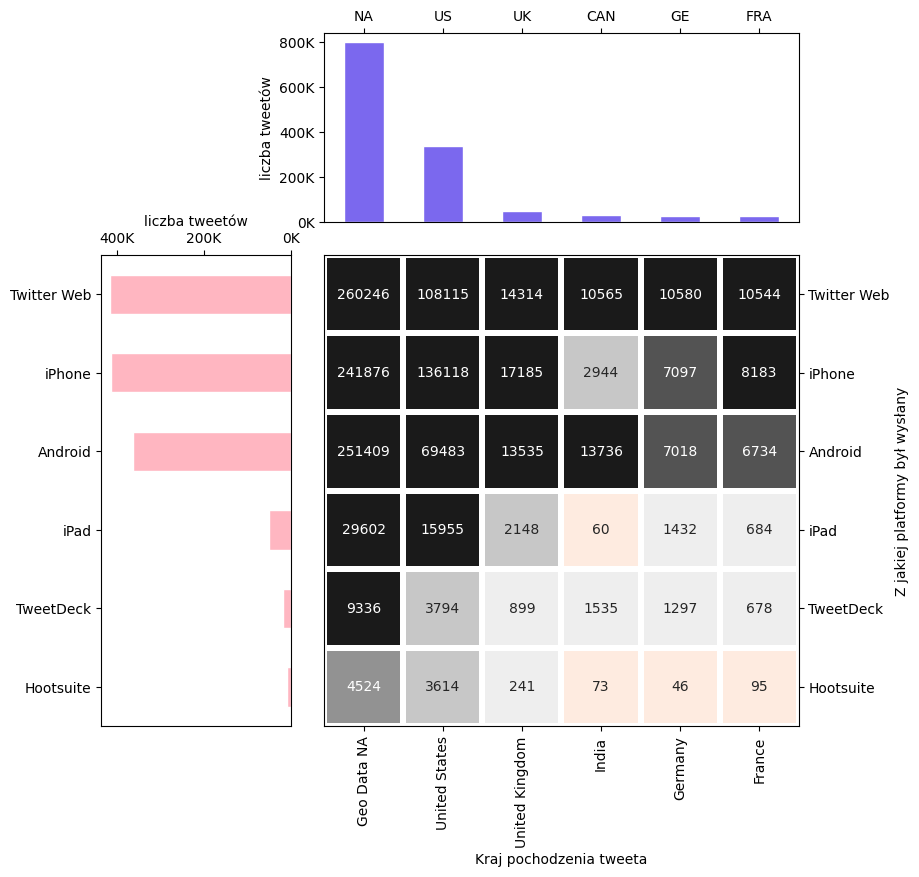

In [7]:
# HEATMAP
fig, ax=plt.subplots(2,2, figsize=(9,9),
                     gridspec_kw={'height_ratios':[2,5], 'width_ratios':[2,5], 'wspace':0.1, 'hspace':0.1})

hide_ax = ax[0,0]
hide_axes(hide_ax)

hm_ax = ax[1,1]
draw_heatmap1(platXtab.loc[sourceslst,countrylst], hm_ax)
hm_ax.set_xlabel('Kraj pochodzenia tweeta')
hm_ax.set_ylabel('Z jakiej platformy był wysłany')
hm_ax.set_yticklabels(('Twitter Web','iPhone','Android','iPad','TweetDeck','Hootsuite'), rotation=0)

bar_ax = ax[0,1]
platXtab.loc[sourceslst,countrylst].sum().plot.bar(ax=bar_ax, color=barcolors[1],**barstyle)
bar_ax.set_xlabel(bar_ax.get_xlabel())
bar_ax.xaxis.tick_top()
bar_ax.xaxis.set_label_position("top")
bar_ax.yaxis.set_major_formatter(formatterK1)
bar_ax.set_xticklabels(('NA', 'US', 'UK', 'CAN', 'GE','FRA'), rotation=0)
bar_ax.set_xlabel('')
bar_ax.set_ylabel('liczba tweetów')

barh_ax = ax[1,0]
platXtab.loc[sourceslst,countrylst].sum(axis=1)[::-1].plot.barh(ax=barh_ax, color=barcolors[2],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.xaxis.set_major_formatter(formatterK1)
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_yticklabels(('Hootsuite','TweetDeck','iPad','Android','iPhone','Twitter Web'), rotation=0)
barh_ax.set_xlabel('liczba tweetów')
barh_ax.set_ylabel('')
plt.show()

In [8]:
import geopandas as gpd  # Add this line to import GeoPandas
# przygotowanie danych do mapowania
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
from shapely.geometry import Point, Polygon
crs = {'init': 'EPSG:4326'}

tmp=pd.concat([tweets_biden[['lat','long']].copy(),tweets_trump[['lat','long']].copy()])
tmp=tmp.dropna()
geometry = [Point(xy) for xy in zip(tmp['long'],tmp['lat'])]
geo_df=gpd.GeoDataFrame(tmp, crs=crs, geometry = geometry)

<ipython-input-8-3558f7c5fcd2>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


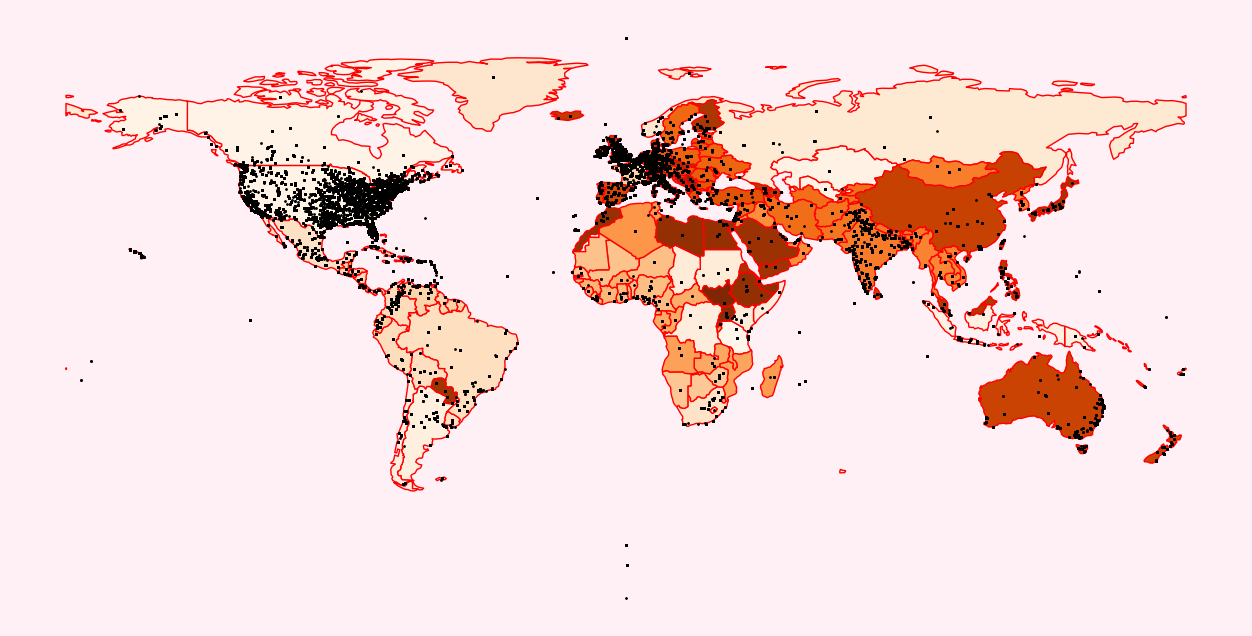

In [9]:
# mapa
fig, ax = plt.subplots(1,figsize=(16,8), facecolor='lavenderblush')
world = world[world.name != "Antarctica"]
world.plot(ax=ax, cmap='Oranges', edgecolors='red')
geo_df.plot(ax=ax, markersize=1, color='black', marker='o')
ax.axis('off')
plt.show()

In [10]:
# zmiana typu zmiennej na datetime object
tweets_biden['user_join_date']=pd.to_datetime(tweets_biden['user_join_date'])
tweets_trump['user_join_date']=pd.to_datetime(tweets_trump['user_join_date'])
tweets_biden['collected_at']=pd.to_datetime(tweets_biden['collected_at'])
tweets_trump['collected_at']=pd.to_datetime(tweets_trump['collected_at'])
tweets_biden['created_at']=pd.to_datetime(tweets_biden['created_at'])
tweets_trump['created_at']=pd.to_datetime(tweets_trump['created_at'])

# utworzenie dodatkowej cechy czasowej
tweets_biden['created_at_r']=tweets_biden['created_at'].dt.strftime('%Y-%m-%d %H')
tweets_trump['created_at_r']=tweets_trump['created_at'].dt.strftime('%Y-%m-%d %H')
tweets_biden['created_at_r2']=tweets_biden['created_at'].dt.strftime('%m-%d')
tweets_trump['created_at_r2']=tweets_trump['created_at'].dt.strftime('%m-%d')

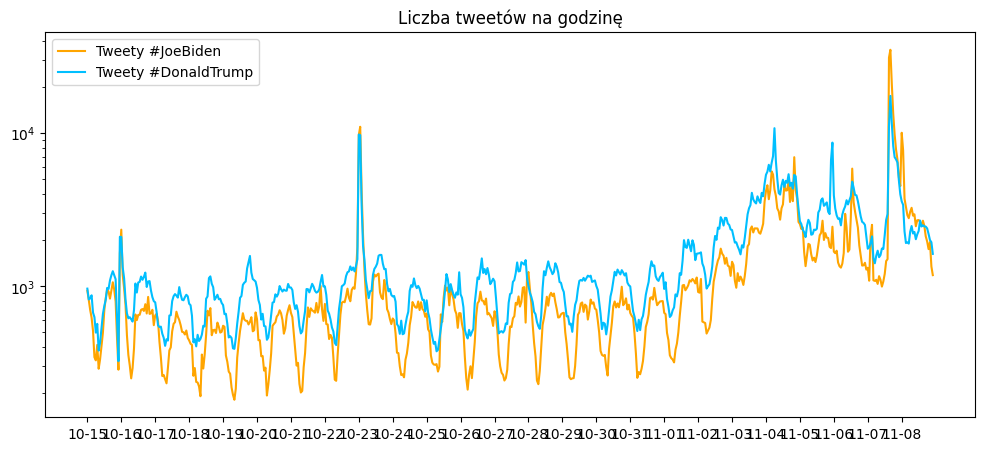

In [11]:
import numpy as np  # Add this line to import NumPy
# przygotowanie danych
common_ids=np.intersect1d(tweets_biden.user_id, tweets_trump.user_id)
common_b=tweets_biden[tweets_biden.user_id.isin(common_ids)].copy()
common_t=tweets_trump[tweets_trump.user_id.isin(common_ids)].copy()

common_df=pd.concat([common_b,common_t])
common_df=common_df.drop_duplicates()

common_creat=np.intersect1d(tweets_biden.created_at_r, tweets_trump.created_at_r)
cnt_tbiden=tweets_biden[tweets_biden.created_at_r.isin(common_creat)]['created_at_r'].value_counts().sort_index()
cnt_ttrump=tweets_trump[tweets_trump.created_at_r.isin(common_creat)]['created_at_r'].value_counts().sort_index()

# szereg czasowy
plt.figure(figsize=(12, 5))
p6 = sns.lineplot(x=cnt_tbiden.index, y=cnt_tbiden.values, color=barcolors[3], label='Tweety #JoeBiden')
p6.set_title('Liczba tweetów na godzinę')
p6 = sns.lineplot(x=cnt_ttrump.index, y=cnt_ttrump.values, color=barcolors[6], label='Tweety #DonaldTrump')
p6.set_xticks(range(0, len(cnt_tbiden.index), 24))
p6.set_xticklabels(common_df['created_at'].dt.strftime('%m-%d').unique().tolist())
p6.set_yscale('log')
plt.show()

In [12]:

# zostawiamy tweety, pochodzące tylko ze Stanów Zjednoczonych
tweets_biden = tweets_biden.loc[tweets_biden['country'] == 'United States of America'][:]
tweets_trump = tweets_trump.loc[tweets_trump['country'] == 'United States of America'][:]


In [13]:
print('Liczba tweetów z USA o Trumpie: ', tweets_trump.shape)
print('Liczba tweetów z USA o Bidenie: ', tweets_biden.shape)

Liczba tweetów z USA o Trumpie:  (213263, 23)
Liczba tweetów z USA o Bidenie:  (181137, 23)


In [14]:
tweets_biden

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,lat,long,city,country,continent,state,state_code,collected_at,created_at_r,created_at_r2
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00.000000000,2020-10-15 00,10-15
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15
6,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:03.106963698,2020-10-15 00,10-15
11,2020-10-15 00:00:57,1.316529e+18,"FBI Allegedly Obtained Hunter Biden Computer, ...",0.0,0.0,Twitter for Android,9.607387e+17,RLCompton,NewfoundStudio,"""There are things known and there are things u...",...,37.572603,-85.155141,NaN,United States of America,North America,Kentucky,KY,2020-10-21 00:00:05.696100113,2020-10-15 00,10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776861,2020-11-08 23:58:09,1.325588e+18,#election #2020Elections #trump #biden https:/...,0.0,0.0,Twitter for iPhone,9.538012e+17,NY Gay and MAGA,NYMike912,Gay proud. not a liberal. I was always a Democ...,...,40.712728,-74.006015,New York,United States of America,North America,New York,NY,2020-11-09 18:32:45.608982000,2020-11-08 23,11-08
776862,2020-11-08 23:58:10,1.325588e+18,@GOP @GOPLeader @senatemajldr @LindseyGrahamSC...,0.0,0.0,Twitter for Android,2.975783e+09,OnCapeCodTime,CapeCodBluesArt,"Indigenous American w/Scottish, Irish, German ...",...,41.798807,-69.996014,NaN,United States of America,North America,Massachusetts,MA,2020-11-09 18:32:45.973973000,2020-11-08 23,11-08
776865,2020-11-08 23:58:24,1.325589e+18,@FLOTUS I’m excited to have a FLOTUS whose vag...,0.0,0.0,Twitter for iPhone,5.545625e+07,Caroline Billinson,cbillinson,my love language is dismantling the patriarchy.,...,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-11-09 18:32:45.841439000,2020-11-08 23,11-08
776870,2020-11-08 23:58:48,1.325589e+18,The man needs some help...#usa #biden\nWhen wi...,0.0,0.0,Twitter for Android,1.248047e+18,Dr J,DrJoeMcCarthy,Human. Free Thinker. Met Mandela. Personal. Fa...,...,43.519630,-114.315320,NaN,United States of America,North America,Idaho,ID,2020-11-09 18:32:45.641087000,2020-11-08 23,11-08


In [15]:
#liczba tweetów-duplikatów w obu zbiorach
tids = tweets_trump.tweet_id
bids = tweets_biden.tweet_id

ids_tweets_in_common = set(tweets_trump.tweet_id).intersection(set(tweets_biden.tweet_id))
len(ids_tweets_in_common)

37364

In [16]:
# jak wyglądają duplikaty
pd.options.display.max_colwidth = 1000 # by więcej zobaczyć

tweets_biden.tweet.loc[tweets_biden.tweet_id.isin(list(ids_tweets_in_common))].head(5)

0     #Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él mismo. El demócrata fue anfitrión de encuentros de electores en #PembrokePines y #Miramar. Clic AQUÍ ⬇️⬇️⬇️\n⠀\n🌐https://t.co/qhIWpIUXsT\n_\n#ElSolLatino #yobrilloconelsol https://t.co/6FlCBWf1Mi
6                      In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.\n\nbut CCP from #China or porn on Twitter? \n\nThat’s always been fine for @jack @vijaya @dickc @KatieS.\n\n@marciadorsey is @jack sick?
17                                               Comments on this? "Do Democrats Understand how Ruthless China is?" https://t.co/QevK00yhs3 #China #HunterBiden #JoeBiden #BidenHarris #BidenHarris2020 #TrumpPence2020 #Trump #realDonaldTrump #WTO #coronavirus #trade https://t.co/Wjm1hyTFNZ
27                                                                                                                                   

In [17]:
unique_trump = tweets_trump[~tweets_trump['tweet_id'].isin(ids_tweets_in_common)]
unique_biden = tweets_biden[~tweets_biden['tweet_id'].isin(ids_tweets_in_common)]



In [18]:
print('Total number of unique records in Trump USA dataset: ', unique_trump.shape)
print('Total number of unique records in Biden USA dataset: ', unique_biden.shape)


Total number of unique records in Trump USA dataset:  (175843, 23)
Total number of unique records in Biden USA dataset:  (143699, 23)


In [19]:
!pip install langdetect

# zostawiamy tylko tweety po angielsku - z pozostałymi biblioteka sobie nie poradzi!
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def get_language(tweet):
    try:
        lang=detect(tweet)
    except:
        lang='no'
        print("This tweet throws an error:", tweet)
    return lang


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=d6cf65576de27eeed89f021044e6c8382aee44cb864299fd74e11b2dd4ea991b
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [20]:
import time
start_time = time.time()

# Use .loc to avoid SettingWithCopyWarning
unique_trump.loc[:, 'lang'] = unique_trump['tweet'].apply(get_language)

stop_time = time.time()
print(f'Trump took {np.around((time.time() - start_time), decimals=1)} seconds')


This tweet throws an error: ⁣
⁣
𝘋𝘰 𝘯𝘰𝘵 𝘷𝘰𝘵𝘦 𝘧𝘰𝘳 #𝘊𝘰𝘷𝘪𝘥𝘪𝘰𝘵𝘐𝘯𝘊𝘩𝘪𝘦𝘧 𝘰𝘳 𝘵𝘩𝘦 #𝘔𝘢𝘴𝘬𝘭𝘦𝘴𝘴𝘋𝘶𝘮𝘣𝘈𝘴𝘴⁣
⁣
𝘕𝘰 𝘮𝘰𝘳𝘦 #𝘛𝘙𝘜𝘔𝘗
This tweet throws an error: 🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸
#Trump https://t.co/KFJ67siWc5
This tweet throws an error: #Trump ⬇️
               ⬇️ 
               ⬇️
               ⬇️
               ⬇️
   ♨️♨️♨️♨️♨️♨️ https://t.co/qQIcwH4aO4
This tweet throws an error: 🎶🎶🎶🎶🎶#TRUMP!🎶🎶🎶🎶🎶 🕺💃😊🇺🇸💫🙏❤️🤍💙 https://t.co/JoVeYtWWmd
This tweet throws an error: #trump #Trump2020 #Trump2020Landslide #RedWave2020 #KAG2020 🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️ https://t.co/ZjNIKAhMOK
This tweet throws an error: @LeslieASpurlock @chainsofpace 💟💟💟♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️
💟💟💟        Vote #Trump To Save America
💟💟💟♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️
💟💟💟               #maga2020 #KAG2020 
♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️

♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️
This tweet throw

<ipython-input-20-7c0589b78f36>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_trump.loc[:, 'lang'] = unique_trump['tweet'].apply(get_language)


In [21]:
start_time = time.time()

unique_biden.loc[:, 'lang'] = unique_biden['tweet'].apply(lambda x: get_language(x))

stop_time = time.time()
print(f'It took {np.around((stop_time - start_time), decimals=1)} seconds')


This tweet throws an error: 👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻#JoeBiden https://t.co/9lnd35iOfq
This tweet throws an error: 🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸

Is #JoeBiden a racist? 

🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸
This tweet throws an error: Two words..
┏━━┓┏━━┓┏━━┓┏━━┓
┗━┓┃┃┏┓┃┗━┓┃┃┏┓┃
┏━┛┃┃┃┃┃┏━┛┃┃┃┃┃
   🇺🇸🇺🇸@RealDonaldTrump 🇺🇸🇺🇸
┃┏━┛┃┃┃┃┃┏━┛┃┃┃┃
┃┗━┓┃┗┛┃┃┗━┓┃┗┛┃
┗━━┛┗━━┛┗━━┛┗━━┛

#HunterBiden #JoeBiden 👉🇨🇳 https://t.co/LrOcj8ni78
This tweet throws an error: ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️#Biden https://t.co/9CvcaErqN6
This tweet throws an error: ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️#joebiden https://t.co/hPFsbGIGQB
This tweet throws an error: 👇🏻✌🏻💙👏🏻👏🏻👏🏻#Biden https://t.co/1YSntdNP1I
This tweet throws an error: #biden 👇🏼👇🏼👇🏼👇🏼👇🏼👇🏼👇🏼👇🏼 https://t.co/YtQTbue3Ez
This tweet throws an error: 🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸#BIDEN https://t.co/njfvCATvn6
This tweet throws an error: #BIDEN ⤵️👇👇👇👇👇👇👇👇👇👇⤵️⤵️⤵️⤵️⤵️⤵️⤵️ https://t.co/wNlRUsqkWB https://t.co/xQejP5xO1S
This tweet throws an error: 𝗟𝗜𝗦𝗧𝗘𝗡𝗜𝗡𝗚 𝗧𝗢 𝗧𝗛𝗘 𝗦𝗖𝗜𝗘𝗡𝗧𝗜𝗦𝗧 ..

<ipython-input-21-04f1cb416a8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_biden.loc[:, 'lang'] = unique_biden['tweet'].apply(lambda x: get_language(x))


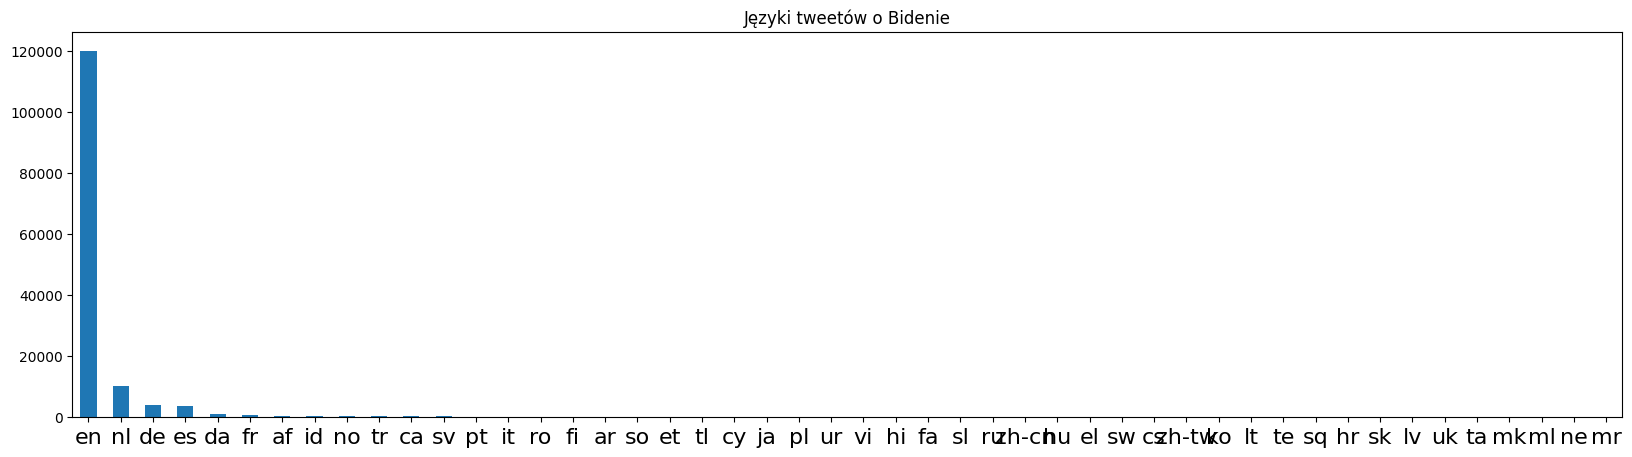

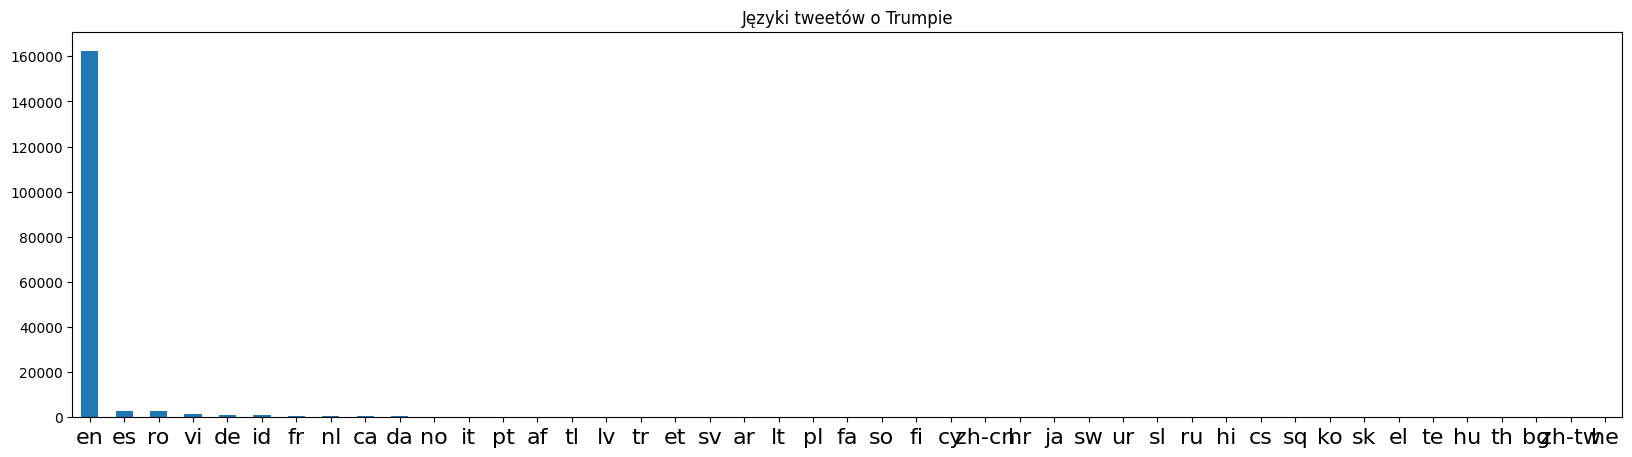

In [22]:
plt.figure(figsize=(20,5))
ax = unique_biden.lang.value_counts().plot.bar(rot=0)
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.title('Języki tweetów o Bidenie')
plt.show()

plt.figure(figsize=(20,5))
ax = unique_trump.lang.value_counts().plot.bar(rot=0)
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.title('Języki tweetów o Trumpie')
plt.show()

In [23]:

tweets_en_biden = unique_biden[unique_biden.lang == 'en']
tweets_en_trump = unique_trump[unique_trump.lang == 'en']

In [24]:
print('Trump: ', tweets_en_trump.shape)
print('Biden: ', tweets_en_biden.shape)

Trump:  (162550, 24)
Biden:  (120262, 24)


In [25]:
tweets_en_biden

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,long,city,country,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,"A Silicon Valley #independent #News #Media #Startup\n *If you have any tips you'd like us to cover, please DM or tag us*",...,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en
21,2020-10-15 00:01:42,1.316530e+18,"In an effort to find the truth about allegations that @Twitter isn't allowing people to share the link to a @nypost article about Hunter Biden, this is what popped up #NYPost #HunterBiden #Biden #Election2020 https://t.co/yYImdZrOKz",1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,"#YAHDOG Posse's Top Guy.\n@illinivideo\n@Illinois_Alma @UIJournalism '23 🔶, @ParklandCollege '21 🐍\nPrevious work: @WGCYRadio.",...,-88.243383,NaN,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en
22,2020-10-15 00:01:47,1.316530e+18,Twitter is doing everything they can to help Democrats win the election. Making sure nobody sees a negative story about Biden. Only Negative stories on Trump. #TwitterCensorship #Biden #Ukraine #HunterBiden https://t.co/dbLKQBMvRU,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,NaN,...,-118.329523,Los Angeles,United States of America,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en
23,2020-10-15 00:01:50,1.316530e+18,#JoeBiden calls him a lier and then insults him for being overweight. Biden shows his low IQ daily. Maybe Joe should hold town halls in kindergarten. He’ll be amongst equals and no one will say anything when he takes his afternoon nap https://t.co/Mr2nh102nG,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,NaN,...,-100.445882,NaN,United States of America,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776836,2020-11-08 23:55:24,1.325588e+18,"#Biden 🗽🇺🇸👍🏽 | Images 📷 @ Santa Maria, CA. | #WeThePeopleHaveSpoken #JoeBiden #KamalaHarris 👍🏽😎 https://t.co/Ck1aAew9ra",1.0,0.0,Twitter for iPhone,1.057408e+09,PROJECT13 MAG,PROJECT13MAG,"Sports | Motorsports | ET, Indie Film & Foodie | CAL1850 Community | 👉🏾Youtube Ch: Project13 Magazine | IG https://t.co/NjgTF6NK5s",...,-118.242766,Los Angeles,United States of America,North America,California,CA,2020-11-09 18:32:45.562902000,2020-11-08 23,11-08,en
776845,2020-11-08 23:56:15,1.325588e+18,Will #criticalRaceTheory become ubiquitous in a #Biden-Harris administration? https://t.co/20EbmT9Nrt,0.0,0.0,Twitter Web App,4.095715e+08,Howard Wachtel,mindovermath,"Retired college #math professor. Single. Bridge enthusiast, Schlager music fan, #Flyers and #Phillies fan. #MAGA #TrumpTrain.",...,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-11-09 18:32:45.773127000,2020-11-08 23,11-08,en
776847,2020-11-08 23:56:21,1.325588e+18,You moving near #Biden 🤔 https://t.co/1F6i1YIJ2P,0.0,0.0,Twitter for iPhone,1.914600e+08,Sean Lassiter,IAmSeanLassiter,Sean Lassiter Photography,...,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-11-09 18:32:45.731141000,2020-11-08 23,11-08,en
776865,2020-11-08 23:58:24,1.325589e+18,@FLOTUS I’m excited to have a FLOTUS whose vagina I haven’t seen on twitte